### This version saves paradigm parameters and does not include some summary variables that can be computed from the main info:
    reversal, post_err, score_total, hit_total, block_acc

In [2]:
from __future__ import division
%matplotlib inline
import sys 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pickle

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [1]:
SBJ = 'IR72'

In [3]:
prj_dir = '/Volumes/hoycw_clust/PRJ_Error/'
results_dir = prj_dir+'results/'
fig_type = '.png'
data_dir = prj_dir+'data/'
sbj_dir  = data_dir+SBJ+'/'
# paths = {'Rana': '/Users/colinhoy/Code/PRJ_Error/data/logs/',
#          'Adi': '/Users/colinhoy/Code/PRJ_Error/data/logs/',
#          'IR57': '/Users/colinhoy/Code/PRJ_Error/data/logs/'}
logs = {'Rana_1.6': 'Rana2_response_log_20170321103129_DATA.txt',
        'Adi_1.7': 'adi_response_log_20170321153641.txt',
        'CP22': '222_response_log_20170609140407.txt',
        'CP23': '223_response_log_20170930123015.txt',
        'CP241': '224-1_response_log_20171206121023.txt',
        'CP242': 'cp24_2_response_log_20171209120902.txt',
        'IR57': '857_response_log_20170322112243_CWHedit.txt',#CWHedit added n_training, n_examples lines
        'IR60': '60_response_log_20170613100307.txt',
        'IR62': 'ir62_response_log_20170713124719.txt',
        'IR63': 'IR63_response_log_20170921095757.txt',
        'IR65': '865_response_log_20171207130759.txt',
        'IR66': 'ir66_response_log_20171219124409.txt',
        'IR67': 'ir673_response_log_20180124103600.txt',
        'IR68': 'IR68_response_log_20180124140950.txt',
        'IR69': '869p2_response_log_20180211111609.txt',#this is 2nd run, another one before!
        'IR71': '71_response_log_20180221115510.txt',
        'IR72': 'Ir72_response_log_20180325133520.txt',#2 log files, this has easy, other has hard blocks
        'IR74': 'ir742_response_log_20180327170333.txt',
        'IR75': 'IR75_response_log_20180531221813.txt',
        'IR76': 'IR76_response_log_20180603181356.txt',
        'IR77': '8772_response_log_20180620124229.txt',#2/3 logs, has 2 easy, 8773 has 2 hards
        'IR78': 'IR78_response_log_20180628052715.txt',
        'IR79': 'IR79_response_log_20180710112314.txt',
        'IR82': 'IR82_response_log_20180928162311.txt',
        'IR84': 'IR84_response_log_20181025094454.txt',
        'P1': 'Pilot1_2_response_log_20170412131644.txt',
        'P2': 'pilot2_response_log_20170412140615.txt',
        'P3': 'pilot3_response_log_20170413110228.txt',
        'P4': 'Pilot4_2_response_log_20170418140941.txt',
        'P5': 'colin_real_response_log_20170412103113.txt',
        'P6': 'pilot_adi_response_log_20170414122257.txt',
        'P7': 'pilot_Rana_response_log_20170415155844.txt',
        'P8': 'Giao_response_log_20170419161340.txt',
        'P9': 'Sundberg_response_log_20170419150222.txt',
        'colin_vec': 'colin_circle_wVec_response_log_20171222141248.txt',
        'colin_novec': 'colin_noVec_response_log_20171222142110.txt'
       }

### Load paradigm parameters

In [4]:
prdm_fname = os.path.join(sbj_dir,'03_events',SBJ+'_prdm_vars.pkl')
with open(prdm_fname, 'rb') as f:
    prdm = pickle.load(f)

In [5]:
# print 'paradigm: ', prdm['prdm_name'], ' v', prdm['prdm_version']
# print
# print 'interval: ', prdm['target'], 's'
# print 'feedback_delay: ', prdm['fb_delay'], 's'
# print 'feedback duration: ', prdm['fb'], 's'
# print 'total trial length: ', prdm['trl_len'], 's'
# print
# print 'n_blocks: ', prdm['n_blocks']
# print 'n_trials/block: ', prdm['n_trials']
# print 'n_full_vis_examples: ', prdm['n_examples']
# print 'n_training/condition: ', prdm['n_training']
# print
# # ITI_bounds = [np.mean(a,b) for a, b in zip(ITIs[:-1],ITIs[1:])]
# print 'ITIs:',prdm['ITIs']#, ITI_bounds
# print 'tolerance_lim:', prdm['tol_lim']

### Load Log Info

In [6]:
behav_fname = os.path.join(sbj_dir,'03_events',SBJ+'_behav.csv')
data = pd.read_csv(behav_fname)

In [7]:
# Label post-correct (PC), post-error (PE) trials
data['PE'] = [False for _ in range(len(data))]
for ix in range(len(data)):
    # Exclude training data and first trial of the block
    if (data.loc[ix,'Block']!=-1) and (data.loc[ix,'Trial']!=0):
        if data.loc[ix-1,'Hit']==0:
            data.loc[ix,'PE'] = True

In [8]:
# pd.set_option('max_rows', 75)
# data[data['Block']==3]

# Plot Behavioral Results

In [9]:
# Find middle of blocks to plot accuracy
block_start_ix = data[data['Trial']==0].index
block_mid_ix = [ix+prdm['n_trials']/2 for ix in block_start_ix[1:]]

# Add in full_vis + E/H training: 0:4 + 5:19 = 10; 20:34 = 27.5 
block_mid_ix.insert(0,np.mean([prdm['n_examples']+prdm['n_training'],
         prdm['n_examples']+2*prdm['n_training']]))   #examples
block_mid_ix.insert(0,np.mean([0, prdm['n_examples']+prdm['n_training']]))   #easy training (would be 12.5 if splitting examples/train)

In [10]:
# Compute accuracy per block
accuracy = data['Hit'].groupby([data['Block'],data['Condition']]).mean()
for ix in range(len(data)):
    data.loc[ix,'Accuracy'] = accuracy[data.loc[ix,'Block'],data.loc[ix,'Condition']]

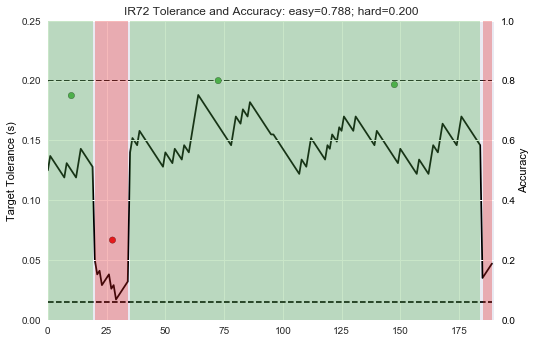

In [11]:
# Accuracy and Tolerance
f, ax1 = plt.subplots()
x = range(len(data))
plot_title = '{0} Tolerance and Accuracy: easy={1:0.3f}; hard={2:0.3f}'.format(
                SBJ, data[data['Condition']=='easy']['Hit'].mean(),
                data[data['Condition']=='hard']['Hit'].mean())
    
colors = {'easy': [c/255 for c in [77,175,74]],
          'hard': [c/255 for c in [228,26,28]],
          'accuracy': 'k'}#[c/255 for c in [55,126,184]]}
accuracy_colors = [colors[accuracy.index[ix][1]] for ix in range(len(accuracy))]
#scale = {'Hit Total': np.max(data['Tolerance'])/np.max(data['Hit Total']),
#         'Score Total': np.max(data['Tolerance'])/np.max(data['Score Total'])}

ax1.plot(data['Tolerance'],'k',label='Tolerance')
ax1.plot(x,[prdm['tol_lim'][0] for _ in x],'k--')
ax1.plot(x,[prdm['tol_lim'][1] for _ in x],'k--')
ax1.set_ylabel('Target Tolerance (s)', color='k')
ax1.set_xlim([0,len(data)])
ax1.set_ylim([0, 0.25])

ax2 = ax1.twinx()
# ax2.plot(data['Hit Total']/np.max(data['Hit Total']),'k',label='Hit Total')
ax2.scatter(block_mid_ix, accuracy, s=40, c=accuracy_colors,
           edgecolors=colors['accuracy'])#,linewidths=2)
ax2.fill_between(x, 1, 0, where=data['Condition']=='easy',
                facecolor=colors['easy'], alpha=0.3, label='hard')
ax2.fill_between(x, 1, 0, where=data['Condition']=='hard',
                facecolor=colors['hard'], alpha=0.3, label='easy')
ax2.set_ylabel('Accuracy', color=colors['accuracy'])
ax2.tick_params('y', colors=colors['accuracy'])
ax2.set_xlabel('Trials')
ax2.set_xlim([0,len(data)])
ax2.set_ylim([0, 1])

plt.title(plot_title)

plt.savefig(results_dir+'BHV/tolerance/'+SBJ+'_tolerance'+fig_type)

# Plot only real data (exclude examples + training)

In [12]:
data_all = data
data = data[(data['Block']!=-1) & (data['RT']>0)]

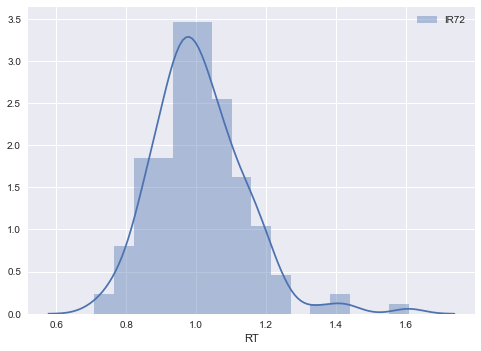

In [13]:
# RT Histogram
ax = sns.distplot(data['RT'],label=SBJ)
plt.subplots_adjust(top=0.9)
ax.legend() # can also get the figure from plt.gcf()
plt.savefig(results_dir+'BHV/RTs/'+SBJ+'_RT_hist'+fig_type)

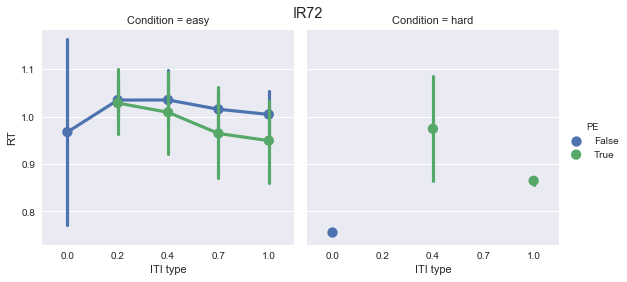

In [14]:
# RTs by condition
# if len(prdm_params['ITIs'])==4:    # target_time v1.8.5+
#     data['ITI type'] = ['short' if data['ITI'][ix]<0.5 else 'long' for ix in range(len(data))]
#     ITI_plot_order = ['short','long']
# elif len(prdm_params['ITIs'])==3:  # target_time v1.8.4 and below
#     data['ITI type'] = ['short' if data['ITI'][ix]<prdm_params['ITI_bounds'][0] else 'long' \
#                         if data['ITI'][ix]>prdm_params['ITI_bounds'][1] else 'medium'\
#                         for ix in range(len(data))]
#     ITI_plot_order = ['short','medium','long']
# else:               # Errors for anything besides len(ITIs)==3,4
#     assert len(prdm_params['ITIs'])==4

plot = sns.factorplot(data=data,x='ITI type',y='RT',hue='PE',col='Condition',kind='point',
               ci=95);#,order=ITI_plot_order
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ) # can also get the figure from plt.gcf()

plt.savefig(results_dir+'BHV/RTs/'+SBJ+'_RT_PE_ITI_hit'+fig_type)

In [15]:
# Break kdown by post-long and post-short trials
data['postlong'] = [False if ix==0 else True if data['RT'].iloc[ix-1]>1 else False for ix in range(len(data))]
data_PL = data[data['postlong']==True]
data_PS = data[data['postlong']==False]

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


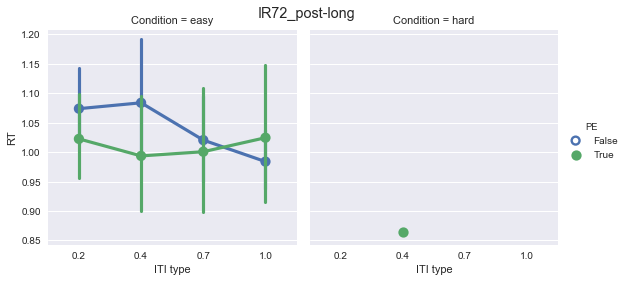

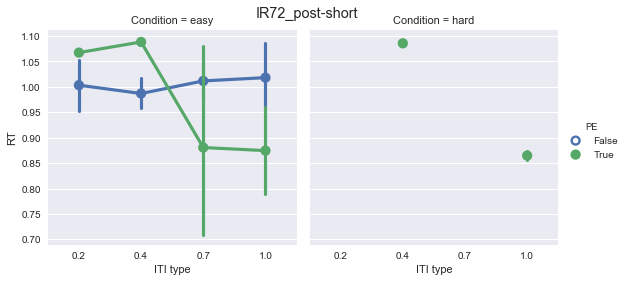

In [16]:
plot = sns.factorplot(data=data_PL,x='ITI type',y='RT',hue='PE',col='Condition',kind='point',
               ci=95,order=prdm['ITIs']);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle(SBJ+'_post-long') # can also get the figure from plt.gcf()

# plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)
plot2 = sns.factorplot(data=data_PS,x='ITI type',y='RT',hue='PE',col='Condition',kind='point',
               ci=95,order=prdm['ITIs']);
plt.subplots_adjust(top=0.9)
plot2.fig.suptitle(SBJ+'_post-short') # can also get the figure from plt.gcf()

# plt.savefig(results_dir+'RT_plots/'+SBJ+'_RT_PE_ITI_hit'+fig_type)

In [35]:
# ITI Histograms
# sns.distplot(data['ITI'],bins=np.arange(0.285,1.01,0.01))

# =================================================
# OLD SHIT
# =================================================

In [ ]:
# RT_means = {'short': np.empty(2),
#            'medium': np.empty(2),
#            'long': np.empty(2)}
# RT_cnt = {'short': np.empty(2),
#            'medium': np.empty(2),
#            'long': np.empty(2)}
# for ITI_type in ['short','medium','long']:
#     RT_means[ITI_type][0] = data.loc[(data['PE']==False) & (data['ITI type']==ITI_type),'RT'].mean()
#     RT_cnt[ITI_type][0] = sum([(data['PE']==False) & (data['ITI type']==ITI_type)]).sum()
#     RT_means[ITI_type][1] = data.loc[(data['PE']==True) & (data['ITI type']==ITI_type),'RT'].mean()
#     RT_cnt[ITI_type][1] = sum([(data['PE']==True) & (data['ITI type']==ITI_type)]).sum()
    
# print(ITI_type)
# print('PE: ',data.loc[data['PE']==True,'RT'].mean(),sum(data['PE']==True))
# print('PC: ',data.loc[data['PE']==False,'RT'].mean(),sum(data['PE']==False))

In [ ]:
# def makeECDF(sample):
#     def ECDF(x):
#         N = len(sample)
#         cumsum = sample<=x
#         CDF = np.sum(cumsum)/N
#         return CDF
#     return ECDF

# ecdf = makeECDF(sample)
# xs = np.linspace(0,1,len(sample))
# ys = [ecdf(x) for x in xs]
# plt.plot(xs,ys)
# sns.distplot(sample,rug=True,hist=False,kde=False)

In [36]:
# def makeECDF(sample):
#     def ECDF(x):
#         N = len(sample)
#         cumsum = sample<=x
#         CDF = np.sum(cumsum)/N
#         return CDF
#     return ECDF

# ecdf = makeECDF(data['Correct'])
# xs = np.linspace(0,1,len(data))
# ys = [ecdf(x) for x in xs]
# plt.plot(xs,ys)
